In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("white")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Importing dataset

In [2]:
mail_data = pd.read_csv('mail.csv')

In [3]:
# printing the dataset.
mail_data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
# Replacing the null values.
new_mail_data = mail_data.where((pd.notnull(mail_data)),"")

In [5]:
# Pring the 5 rows of the dataframe.
new_mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# Printing the rows and columns in the dataframe.
new_mail_data.shape

(5572, 2)

In [7]:
# Showing dataset statistics.
mail_data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


C:\Users\prem1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


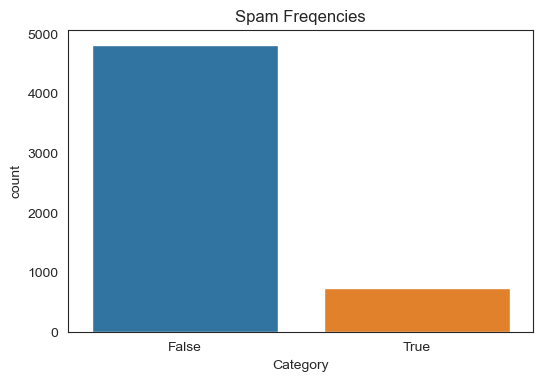

In [12]:
# Visualize spam frequencies.
plt.figure(dpi=100)
sns.countplot(mail_data["Category"] == "spam")
plt.title("Spam Freqencies")
plt.show()

C:\Users\prem1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


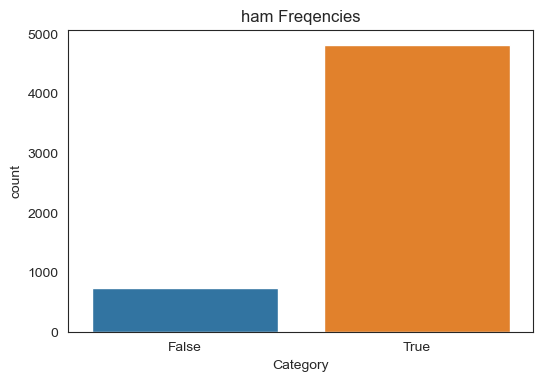

In [13]:
# Visualize ham frequencies.
plt.figure(dpi=100)
sns.countplot(mail_data["Category"] == "ham")
plt.title("ham Freqencies")
plt.show()

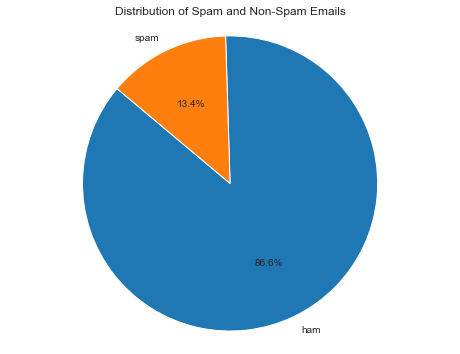

In [14]:
# Plotting pie chart.
mail_data["Category"].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(mail_data["Category"].value_counts(), labels=mail_data["Category"].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Spam and Non-Spam Emails')
plt.axis('equal') 
plt.show()

From the above graph we can see most emails in the dataset (86.6%) are non-spam (ham), while only a smaller portion (13.4%) are classified as spam. This difference is important because it affects how well our model can spot spam emails. 

In [ ]:
# Marking spam category as 0.
new_mail_data.loc[new_mail_data["Category"] == "spam" ,"Category",] = 0

In [ ]:
# Marking ham category as 1.
new_mail_data.loc[new_mail_data["Category"] == "ham" ,"Category",] = 1

Spam = 0
Ham = 1

 Taking,

 x axis = Messages as Input

Y axis = Category as output

In [ ]:
# Seperating the data as text and labels.
x = new_mail_data["Message"]
y = new_mail_data["Category"]

In [ ]:
print(x)

In [ ]:
print(y)

Splitting the data into training data and test data.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=3)

In [ ]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)


Converting the text data into numerical values to understand by Logistic Regression.

In [ ]:
# TfidfVectorizer is used to generate scores for the repeated words.
# stop_words="english" will ignore the words which don't have a meaning eg., the,did etc.
# lowercase="True" will convert all the data in lowercase to ease the process.

input_data = TfidfVectorizer(min_df = 1, stop_words="english", lowercase="True")

# we have to perform fit_transformation only once with x_train_data.

x_train_data = input_data.fit_transform(x_train)
x_test_data = input_data.transform(x_test)

# Converting y_train and y_test values into numerical values.
# As 0 and 1 above(y) is not considered as integer, it is considered as objects or strings.

y_train = y_train.astype("int")
y_test = y_test.astype("int")





In [ ]:
# Printing the x_tarin values without transform.
print(x_train)

In [ ]:
# Printing the x_train_data values with transform.
print(x_train_data)

Training the Logistic Regression model

In [ ]:
model = LogisticRegression()

In [ ]:
# Training the Logistic Regression model with the training data.
model.fit(x_train_data,y_train)

In [ ]:
# Prediction on training data.
prediction_on_training_data = model.predict(x_train_data)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)

In [ ]:
print("Accuracy on training data : ", accuracy_on_training_data)

In [ ]:
# Prediction on test data.
prediction_on_test_data = model.predict(x_test_data)
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)

In [ ]:
print("Accuracy on test data : ", accuracy_on_test_data)

Making Prediction whether a email is Spam or Ham.

In [ ]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times."]

# Converting the text data into numerical values or feature vectors.
input_mail_data = input_data.transform(input_mail)

# Making the prediction.
prediction = model.predict(input_mail_data)
print(prediction)

if prediction[0] == 1:
    print("Email is Ham")
else:
    print("Email is Spam")